# Diversity Python User Interface

Also known as "Pyversity"

Load diversity python module

In [1]:
from pyversity import *

Create a system

In [2]:
system = System("HelloWorld")
system2 = System("HelloWorld", timed="discrete")
system3 = System("HelloWorld", timed="continuous")
print(system)
print(system2)
print(system3)

@xlia< system , 1.0 >:

system HelloWorld {
}

@xlia< system , 1.0 >:

timed#discrete system HelloWorld {
}

@xlia< system , 1.0 >:

timed#continuous system HelloWorld {
}



Have a look into it

HelloWorld
@xlia< system , 1.0 >:

system HelloWorld {
}



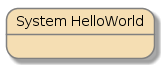

In [3]:
print(repr(system)) # Identifier name (normally reserved to developers)
print(system)       # Fully detailed description
display(system)     # Graphical visualization (system only at the moment)

Create a state machine

In [4]:
#sm1 = StateMachine("sm1")
#sm2 = StateMachine("sm2")
#print(repr(sm1), repr(sm2))
#print(sm1)
#print(sm2)

Add the state machine to the system

@xlia< system , 1.0 >:

system HelloWorld {
@composite:
	statemachine< or > sm1 {
	}

	statemachine< or > sm2 {
	}
}



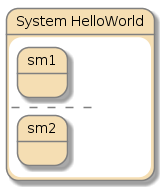

In [5]:
sm1 = system.addStateMachine("sm1")
sm2 = system.addStateMachine("sm2")
print(system)
display(system)

Add states to the state machine (__Caution: Elements names should not contain whitespaces or special characters '#' and ':'__)

state< initial > Begin {
}

statemachine< or > sm2 {
@region:
	state< initial > One {
	}

	state Two {
	}

	state< final > Three {
	}
}



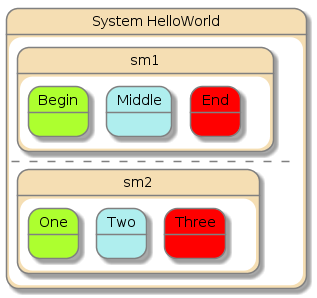

In [6]:
s10 = sm1.addInitialState("Begin")
s11 = sm1.addState("Middle")
s12 = sm1.addFinalState("End")
print(s10)

s20 = sm2.addInitialState("One")
s21 = sm2.addState("Two")
s22 = sm2.addFinalState("Three")
print(sm2)

display(system)

Add transition to the state machine

transition T01 --> Middle;

@xlia< system , 1.0 >:

system HelloWorld {
@composite:
	statemachine< or > sm1 {
	@region:
		state< initial > Begin {
			transition T01 --> Middle;
		}

		state Middle {
			transition T12 --> End;
		}

		state< final > End {
		}
	}

	statemachine< or > sm2 {
	@region:
		state< initial > One {
		}

		state Two {
			transition t22 --> Two;
		}

		state< final > Three {
		}
	}
}



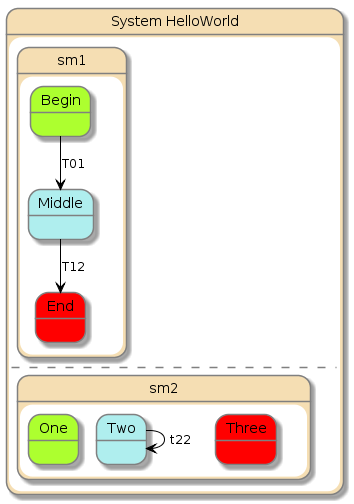

In [7]:
t01 = s10.addTransition("T01", s11)
t12 = s11.addTransition("T12", s12)
print(t01)

#t12 = s1.addTransition("Finishing", s2)
#t34 = s3.addTransition("Terminating", s3)
#t15 = s1.addTransition("Making_a_choice",s5)
#t11 = s1.addTransition("I_like_myself", s1)

t21 = s21.addTransition("t22", s21)
#t45 = s4.addTransition("t45", s2)

print(system)
display (system)

Add ports to the state machine

In [8]:
p11 = sm1.addOutPort('p11', params=['string','string'])
p12 = sm1.addOutPort('p12', params=['string','string'])
p21 = sm2.addInPort("p21", params=['string', 'string'])
print(p11)
print(system)

public output port p11(string, string);

@xlia< system , 1.0 >:

system HelloWorld {
@composite:
	statemachine< or > sm1 {
	@property:
		public output port p11(string, string);
		public output port p12(string, string);

	@region:
		state< initial > Begin {
			transition T01 --> Middle;
		}

		state Middle {
			transition T12 --> End;
		}

		state< final > End {
		}
	}

	statemachine< or > sm2 {
	@property:
		public input port p21(string, string);

	@region:
		state< initial > One {
		}

		state Two {
			transition t22 --> Two;
		}

		state< final > Three {
		}
	}
}



Connect ports together

In [9]:
system.connectRdv(p12, p21)
system.connectRdv(p11, p21)

#system.connectEnv(p12)
#sm1.connectRdv(p11, p12)
print(system)

@xlia< system , 1.0 >:

system HelloWorld {
@composite:
	statemachine< or > sm1 {
	@property:
		public output port p11(string, string);
		public output port p12(string, string);

	@region:
		state< initial > Begin {
			transition T01 --> Middle;
		}

		state Middle {
			transition T12 --> End;
		}

		state< final > End {
		}
	}

	statemachine< or > sm2 {
	@property:
		public input port p21(string, string);

	@region:
		state< initial > One {
		}

		state Two {
			transition t22 --> Two;
		}

		state< final > Three {
		}
	}

@com:
	connector< rdv , unicast >  {
		input sm2->p21;
		output sm1->p12;
	}
	connector< rdv , unicast >  {
		input sm2->p21;
		output sm1->p11;
	}
}



@startuml

component "HelloWorld" as HelloWorld {
component "sm1" as sm1 {
component "Begin" as Begin
component "Middle" as Middle
component "End" as End
}
interface "p11" as sm1.p11
sm1 #-- sm1.p11
interface "p12" as sm1.p12
sm1 #-- sm1.p12
component "sm2" as sm2 {
component "One" as One
component "Two" as Two
component "Three" as Three
}
interface "p21" as sm2.p21
sm2 #-- sm2.p21
sm2.p21 -. sm1.p12
sm2.p21 -. sm1.p11
}
@enduml


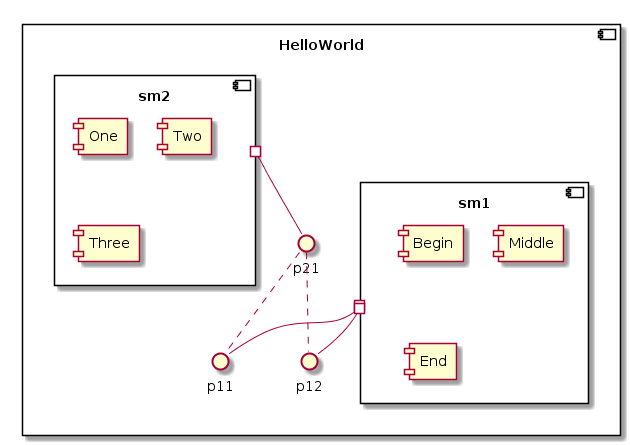

In [10]:
print(displayCommGraph(system))
Image(PlantUML().processes(displayCommGraph(system)))

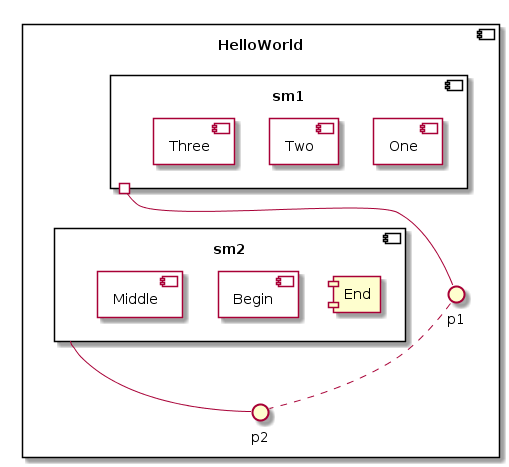

In [11]:
interrecationString = """@startuml 
    component HelloWorld as "HelloWorld"{
        component "sm1" as sm1 {
            component "One" as One{            
            }
            component "Two" as Two{
            }
            component "Three" as Three{
            }

        }
        
        component "sm2" as sm2{
            component "Begin" as Begin{            
            }
            component "Middle" as Middle{
            }
            component "End" as End
        }
        interface "p1" as sm1.p1
        sm1 #-- sm1.p1
        
        interface "p2" as sm2.p2
        sm2 -- sm2.p2        
        
        sm1.p1 -. sm2.p2 
    }
    @enduml
"""
Image(PlantUML().processes(interrecationString))

Add statement to transitions

In [12]:
v1 = sm1.addIntVar("v1", init=43)
v2 = sm1.addIntVar("v2")
c1 = sm1.addIntConst("c1", 41)
c2 = sm1.addBoolConst("c2", True)
c3 = sm1.addStringConst("c3", "Hello")
cl = sm1.addClock("cl")

#ok = t12.addSend(p12, ["2*v1 + 1"])
#ok = t12.addReceive(p12, ["v2"])
ok = t12.addStatement("v2 = 43")
ok = t12.addGuard("v2 == 43")
ok = t12.addClockGuard("cl > 0")

print(t12)
print(sm1)

transition T12 --> End { |;|
	sm1.v2 := 43;
	guard (sm1.v2 == 43);
	tguard (sm1.cl > 0);
}

statemachine< or > sm1 {
@property:
	public output port p11(string, string);
	public output port p12(string, string);
	var int v1 = 43;
	var int v2;
	const int c1 = 41;
	const bool c2 = true;
	const string c3 = "Hello";
	var clock cl;

@region:
	state< initial > Begin {
		transition T01 --> Middle;
	}

	state Middle {
		transition T12 --> End { |;|
			sm1.v2 := 43;
			guard (sm1.v2 == 43);
			tguard (sm1.cl > 0);
		}
	}

	state< final > End {
	}
}



Ajout d'une variable

In [13]:
print(ok)
print(v1) # Full detailed description
print(repr(v1)) # Identifier name
print(v1 + 2 * v2)
print(v2 - v1)
print(v1 + 21)
print(21 + v2)
print(1 + 2 + v1)
#print(v2 + 2 + 1)
print(v1 + v1)
#print(1 + (2 + v1))
[v1+1]



True
var int spec::HelloWorld.sm1.v1 = 43
v1
v1 + 2 * v2
v2 - v1
v1 + 21
21 + v2
3 + v1
v1 + v1


['v1 + 1']

## Create your configuration

Configuration is holding the general parameters of the computation.

In [14]:
c = Configuration()
c.setWorkspace(rootdir='./', outdir='./')
c.setAnalysisType('exploration',slice=False)
c.setStrategy('DFS')
c.setSolver('Z3')
c.setVerbosity('SILENT')
#c.setDevOpts(level='HIGH', log='monLog.log', debug='myDebug.dbg')
#c.setDevFlags('GOD_MODE')
c.check()
print(c)

in setAnalysisType
in setVerbosity
Configuration check:  all ok.
workflow {
        workspace [
                root = "./"
                launch = "./"
                output = "./"
        ]
        director  {
                manifest [
                        autoconf = true
                        autostart = true
                ]
                project [
                        source = "."
                ]
                supervisor {
                        limit [
                                step = 42
                        ]
                        queue [
                                strategy = 'DEPTH_FIRST_SEARCH'
                        ]
                }
                worker [
                ]
        }
        symbex [
                constraint_solver = 'Z3'
        ]
        console [
                verbose = 'SILENT'
        ]
        developer [
        ]
}



## Engine : la classe mère

In [15]:
engine = Engine(c)
print(engine)
ok = engine.setSystem(system)
print ("Set system:", ok)
result = engine.start()
print(result.report())
#Image(PlantUML().processes(result.display()))


#serializer = TTCN3Serializer()
#serializer.generate(result)

Configuration successfully loaded
System successfully loaded.
Set system: None
REPORT
	SUPERVISOR  PROCESSOR
		The RUN#EXIT count : 1

